In [1]:
##  preserntation for a confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()



In [2]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/12
469/469 [==============================] - 144s 306ms/step - loss: 2.2806 - accuracy: 0.1424 - val_loss: 2.2384 - val_accuracy: 0.3321
Epoch 2/12
469/469 [==============================] - 144s 307ms/step - loss: 2.2105 - accuracy: 0.2632 - val_loss: 2.1487 - val_accuracy: 0.5968
Epoch 3/12
469/469 [==============================] - 144s 307ms/step - loss: 2.1173 - accuracy: 0.3779 - val_loss: 2.0275 - val_accuracy: 0.6804
Epoch 4/12
469/469 [==============================] - 144s 306ms/step - loss: 1.9901 - accuracy: 0.4706 - val_loss: 1.8650 - val_accuracy: 0.7401
Epoch 5/12
469/469 [==============================] - 144s 307ms/step - loss: 1.8274 - accuracy: 0.5434 - val_loss: 1.6622 - val_accuracy: 0.7778
Epoch 6/12
469/469 [==============================] - 144s 306ms/step - loss: 1.6449 - accuracy: 0.5883 - val_loss: 1.4393 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


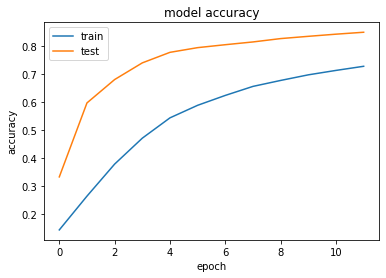

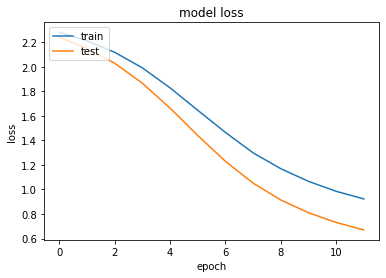

In [3]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [4]:
predictions = model.predict(x_test, verbose=0)



In [5]:


yitest = np.argmax(y_test, axis=1)

yptest = np.argmax(predictions, axis=1)
print (yitest)
print (yptest)

[7 2 1 ... 4 5 6]
[7 2 1 ... 9 8 6]


In [6]:
## For analysis show also the confusion matrix



cfm = confusion_matrix(yitest, yptest)
print (cfm)

[[ 932    1    1    4    0    3   18    1   20    0]
 [   0 1082   19   12    1    2    5    0   10    4]
 [  20    4  867   14   16    0   36   26   46    3]
 [   3    5   29  894    0   13    5   19   19   23]
 [   3   16    4    0  790    0   26    4    6  133]
 [  25    9    7  103   33  619   23    8   48   17]
 [  18   22    6    0   14   18  878    1    1    0]
 [   3   31   34    3   13    0    0  889    9   46]
 [  14   33   14   76    9   16   14   19  729   50]
 [  20   12   10   13   86    1    2   40    8  817]]


Confusion matrix, without normalization


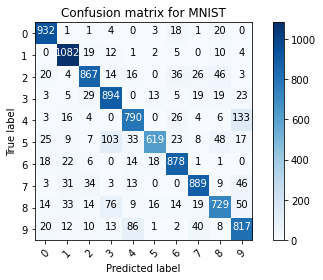

In [7]:
plot_confusion_matrix(cfm, classes=range(10), 
                      title='Confusion matrix for MNIST')

